Deep Attractor Network Implementation
===================

### Found in: DEEP ATTRACTOR NETWORK FOR SINGLE-MICROPHONE SPEAKER SEPARATION ###

#### Authors: Zhuo Chen, Yi Luo, Nima Mesgarani ####

In [74]:
# import statements
import os
import pydub
import librosa
import tflearn
import tensorflow as tf
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
%matplotlib inline

In [75]:
# define the Two-Speaker network that contains 201 files from two speakers
Two_Speaker = '/home/cc/Data/Two-Speaker/'

In [3]:
# the log spectral magnitude is used as the input feature, will use librosa to find these
# as an example, will grab one audio file and display its log spectral magnitude
single_file = Two_Speaker + 'Speaker0_0.wav'
y, fs = librosa.load(single_file)

##### Compute the log spectral magnitude by: #####

   >Taking the short-time Fourier transform (STFT) with:
   
      >-32 ms window length
      
      >-8 ms hop size
      
      >-square root of the hanning window

In [9]:
S = librosa.feature.melspectrogram(y=y, sr=fs, n_fft=32, hop_length=8)

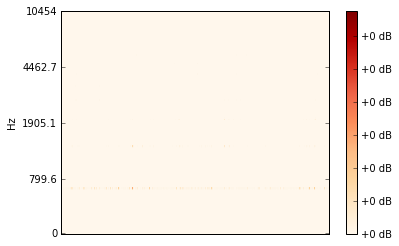

In [10]:
librosa.display.specshow(S, sr=fs, y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [17]:
y_stft = librosa.stft(y=y, n_fft=32, hop_length=8)

In [24]:
y_stft.shape

(17, 40173)

In [31]:
# the log spectral magnitude is used as the input feature, will use librosa to find these
# as an example, will grab one audio file and display its log spectral magnitude
single_file = '/home/cc/Data/Segment-Four/Speaker1_32.wav'
y, fs = librosa.load(single_file)
y_stft1 = librosa.stft(y=y, n_fft=32, hop_length=8)

In [32]:
y_stft1.shape

(17, 11026)

In [33]:
example = pydub.AudioSegment.from_wav(single_file)

In [58]:
a = example.frame_count()

In [59]:
a

64000.0

In [60]:
frame_ms = a/1000

In [61]:
frame_ms

64.0

In [62]:
ms_per_frame = 100 / frame_ms

In [63]:
ms_per_frame

1.5625

In [70]:
seg = example[:ms_per_frame*4]

In [71]:
seg.frame_count()

100.0

In [76]:
# grab all audio files in folder
audio_files = []
for f in os.listdir(Two_Speaker):
    audio_files.append(pydub.AudioSegment.from_wav(Two_Speaker + f))

In [ ]:
# segment the data into 100-frame length
segments = []
for audio in audio_files:
    frame_ms = audio.frame_count() / 1000
    ms_per_frame = 100 / frame_ms
    segments